# Week 6 Practice

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [3]:
initial_data = yf.download("AAPL AMZN FB GOOG MSFT TSLA SPY ^VIX", start="2020-02-01", end="2021-02-01")

[*********************100%***********************]  8 of 8 completed


In [4]:
initial_data.head()

Adj Close                                                    \
                 AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                      
2020-02-03  76.390160  2004.199951  204.190002  1485.939941  172.155548   
2020-02-04  78.912079  2049.669922  209.830002  1447.069946  177.822327   
2020-02-05  79.555550  2039.869995  210.110001  1448.229980  177.605148   
2020-02-06  80.486107  2050.229980  210.850006  1476.229980  181.287552   
2020-02-07  79.392090  2079.280029  212.330002  1479.229980  181.544250   

                                                   Close               ...  \
                   SPY        TSLA       ^VIX       AAPL         AMZN  ...   
Date                                                                   ...   
2020-02-03  318.178101  156.000000  17.969999  77.165001  2004.199951  ...   
2020-02-04  323.027496  177.412003  16.049999  79.712502  2049.669922  ...   
2020-02-05  326.757843  146.940002  15.150000  80.362503  2039.869995  ...   
2020-02-06  327.857330  149.792007  14.960000  81.302498  2050.229980  ...   
2020-02-07  326.109955  149.613998  15.470000  80.007500  2079.280029  ...   

                  Open                Volume                              \
                  TSLA       ^VIX       AAPL     AMZN        FB     GOOG   
Date                                                                       
2020-02-03  134.738007  18.639999  173985600  5899100  15495600  3036800   
2020-02-04  176.591995  16.450001  136616400  5289300  19628900  3933000   
2020-02-05  164.651993  16.290001  118826800  4376200  12538200  1986200   
2020-02-06  139.983994  15.130000  105425600  3183000  10567500  1679400   
2020-02-07  146.110001  15.070000  117684000  5095300  12242500  1172300   

                                                
                MSFT       SPY       TSLA ^VIX  
Date                                            
2020-02-03  30149100  69242300  236167500    0  
2020-02-04  36433300  62573200  304694000    0  
2020-02-05  39186300  65951100  242119000    0  
2020-02-06  27751400  50359700  199404000    0  
2020-02-07  33529100  64139400   85317500    0  

[5 rows x 48 columns]

In [5]:
initial_data['Adj Close'].head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-03,76.390160,2004.199951,204.190002,1485.939941,172.155548,318.178101,156.000000,17.969999
2020-02-04,78.912079,2049.669922,209.830002,1447.069946,177.822327,323.027496,177.412003,16.049999
2020-02-05,79.555550,2039.869995,210.110001,1448.229980,177.605148,326.757843,146.940002,15.150000
2020-02-06,80.486107,2050.229980,210.850006,1476.229980,181.287552,327.857330,149.792007,14.960000
2020-02-07,79.392090,2079.280029,212.330002,1479.229980,181.544250,326.109955,149.613998,15.470000


Set the Adj Closed data as a new DataFrame we will use.

In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-02-03 to 2021-01-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   AMZN    251 non-null    float64
 2   FB      251 non-null    float64
 3   GOOG    251 non-null    float64
 4   MSFT    251 non-null    float64
 5   SPY     251 non-null    float64
 6   TSLA    251 non-null    float64
 7   ^VIX    251 non-null    float64
dtypes: float64(8)
memory usage: 17.6 KB


In [7]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-03,76.390160,2004.199951,204.190002,1485.939941,172.155548,318.178101,156.000000,17.969999
2020-02-04,78.912079,2049.669922,209.830002,1447.069946,177.822327,323.027496,177.412003,16.049999
2020-02-05,79.555550,2039.869995,210.110001,1448.229980,177.605148,326.757843,146.940002,15.150000
2020-02-06,80.486107,2050.229980,210.850006,1476.229980,181.287552,327.857330,149.792007,14.960000
2020-02-07,79.392090,2079.280029,212.330002,1479.229980,181.544250,326.109955,149.613998,15.470000


In [8]:
data.tail()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-01-25,142.706757,3294.000000,278.010010,1899.400024,229.002563,384.390015,880.799988,23.190001
2021-01-26,142.946396,3326.129883,282.049988,1917.239990,231.796143,383.790009,883.090027,23.020000
2021-01-27,141.848038,3232.580078,272.140015,1830.790039,232.364822,374.410004,864.159973,37.209999
2021-01-28,136.885452,3237.620117,265.000000,1863.109985,238.380966,377.630005,835.429993,30.209999
2021-01-29,131.763107,3206.199951,258.329987,1835.739990,231.426987,370.070007,793.530029,33.090000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

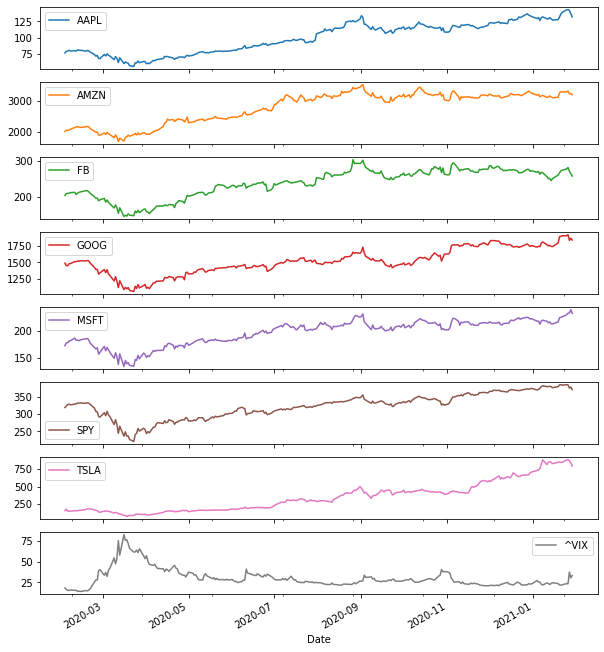

In [9]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [10]:
data.describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00
mean,99.26,2786.81,238.32,1509.90,196.39,322.36,346.20,30.20
std,23.46,506.38,39.13,196.40,22.85,36.45,212.05,11.63
min,55.66,1676.61,146.01,1056.62,134.06,220.15,72.24,13.68
25%,78.57,2375.50,211.07,1403.55,181.30,299.44,160.73,23.22
50%,105.73,3057.04,245.64,1500.34,203.72,327.86,302.61,26.97
75%,118.64,3185.01,270.34,1647.31,213.62,347.08,441.68,33.32
max,142.95,3531.45,303.91,1917.24,238.38,384.39,883.09,82.69


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.diff().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,2.521919,45.469971,5.639999,-38.869995,5.666779,4.849396,21.412003,-1.92
2020-02-05,0.643471,-9.799927,0.279999,1.160034,-0.217178,3.730347,-30.472000,-0.90
2020-02-06,0.930557,10.359985,0.740005,28.000000,3.682404,1.099487,2.852005,-0.19
2020-02-07,-1.094017,29.050049,1.479996,3.000000,0.256699,-1.747375,-0.178009,0.51


In [12]:
data.diff().describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,0.22,4.81,0.22,1.40,0.24,0.21,2.55,0.06
std,2.72,64.65,6.45,34.02,4.85,5.95,18.24,3.74
min,-10.49,-187.96,-24.27,-135.40,-23.17,-28.93,-88.11,-17.64
25%,-1.10,-31.97,-3.60,-15.76,-2.23,-2.00,-5.35,-1.36
50%,0.17,6.74,0.55,4.77,0.56,0.77,1.58,-0.27
75%,1.72,38.98,3.61,20.01,2.57,3.30,11.07,0.96
max,10.02,234.87,23.09,107.81,19.57,20.82,63.98,24.86


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [13]:
data.pct_change().round(4).head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.0330,0.0227,0.0276,-0.0262,0.0329,0.0152,0.1373,-0.1068
2020-02-05,0.0082,-0.0048,0.0013,0.0008,-0.0012,0.0115,-0.1718,-0.0561
2020-02-06,0.0117,0.0051,0.0035,0.0193,0.0207,0.0034,0.0194,-0.0125
2020-02-07,-0.0136,0.0142,0.0070,0.0020,0.0014,-0.0053,-0.0012,0.0341


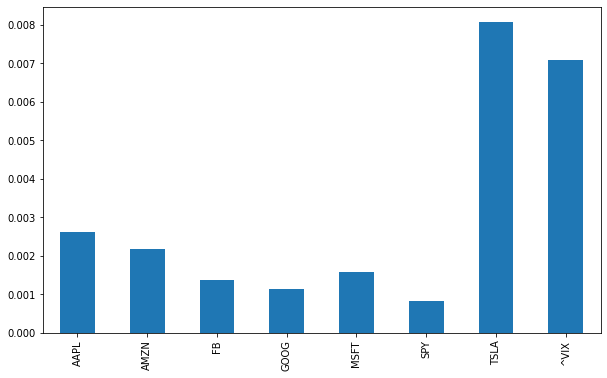

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.0325,0.0224,0.0272,-0.0265,0.0324,0.0151,0.1286,-0.1130
2020-02-05,0.0081,-0.0048,0.0013,0.0008,-0.0012,0.0115,-0.1885,-0.0577
2020-02-06,0.0116,0.0051,0.0035,0.0191,0.0205,0.0034,0.0192,-0.0126
2020-02-07,-0.0137,0.0141,0.0070,0.0020,0.0014,-0.0053,-0.0012,0.0335


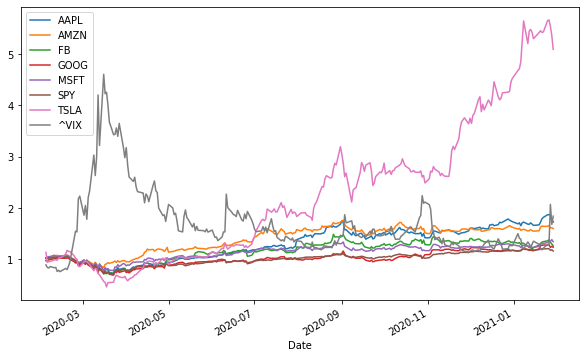

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample('1w', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-09,79.392090,2079.280029,212.330002,1479.229980,181.544250,326.109955,149.613998,15.470000
2020-02-16,80.612625,2134.870117,214.179993,1520.739990,182.985611,331.410980,160.005997,13.680000
2020-02-23,77.660507,2095.969971,210.179993,1485.109985,176.793411,327.366516,180.199997,17.080000
2020-03-01,67.814331,1883.750000,192.470001,1339.329956,160.380188,290.828827,133.598007,40.110001
2020-03-08,71.701706,1901.089966,181.089996,1298.410034,159.944641,292.006836,140.695999,41.939999


In [18]:
data.resample('1m', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-02-29,67.814331,1883.750000,192.470001,1339.329956,160.380188,290.828827,133.598007,40.110001
2020-03-31,63.083504,1949.719971,166.800003,1162.810059,156.123474,254.512680,104.800003,53.540001
2020-04-30,72.885025,2474.000000,204.710007,1348.660034,177.407196,286.831604,156.376007,34.150002
2020-05-31,79.087120,2442.370117,225.089996,1428.920044,181.911774,300.497772,167.000000,27.510000
2020-06-30,90.743469,2758.820068,227.070007,1413.609985,202.023819,305.826904,215.962006,30.430000


<AxesSubplot:xlabel='Date'>

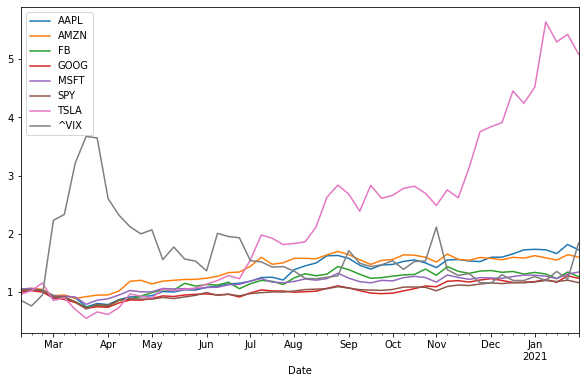

In [19]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

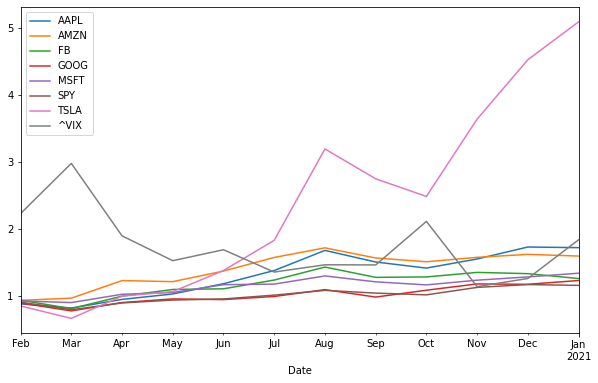

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [21]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2021-01-25,142.706757
2021-01-26,142.946396
2021-01-27,141.848038
2021-01-28,136.885452
2021-01-29,131.763107


In [22]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2020-02-14,80.612625,76.390160,79.616924,1.341984,79.662357,81.170799,80.616075
2020-02-18,79.136566,78.912079,79.891564,0.765415,79.662357,81.170799,79.506443
2020-02-19,80.282684,79.136566,80.028625,0.689483,80.025925,81.170799,80.088624
2020-02-20,79.459068,79.136566,80.018977,0.697467,80.025925,81.170799,79.616457
2020-02-21,77.660507,77.660507,79.736417,0.995764,79.614117,81.170799,78.149495


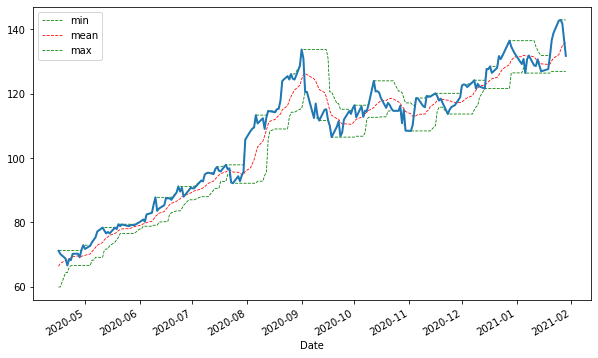

In [23]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [24]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2021-01-25,142.706757,131.971294,123.887571
2021-01-26,142.946396,132.529959,124.422630
2021-01-27,141.848038,132.798059,124.870937
2021-01-28,136.885452,132.908893,125.343855
2021-01-29,131.763107,132.821025,125.732896


<AxesSubplot:xlabel='Date'>

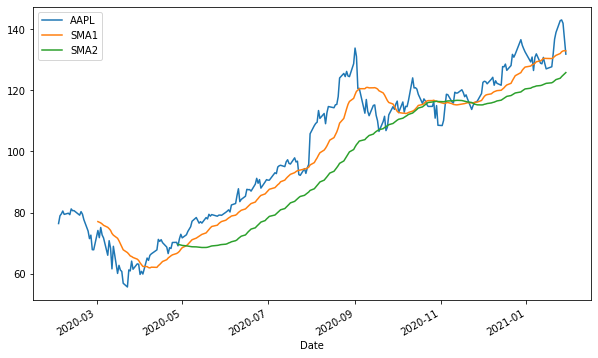

In [25]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

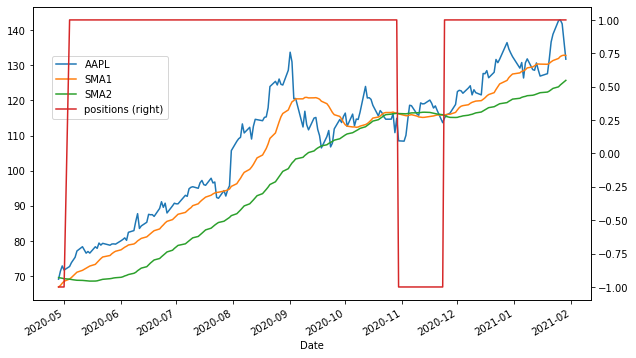

In [26]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [27]:
Corr_data = data[['SPY', '^VIX']].dropna()
Corr_data.tail()

,SPY,^VIX
Date,,
2021-01-25,384.390015,23.190001
2021-01-26,383.790009,23.020000
2021-01-27,374.410004,37.209999
2021-01-28,377.630005,30.209999
2021-01-29,370.070007,33.090000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

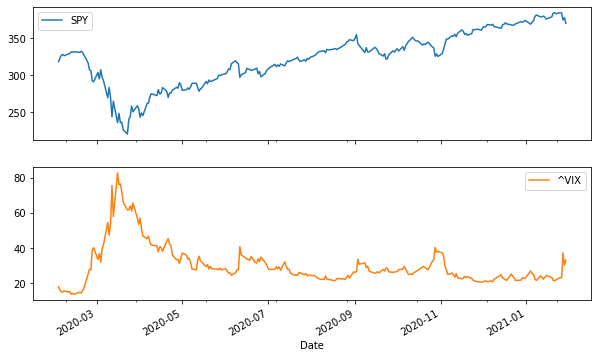

In [28]:
Corr_data.plot(subplots=True, figsize=(10, 6))

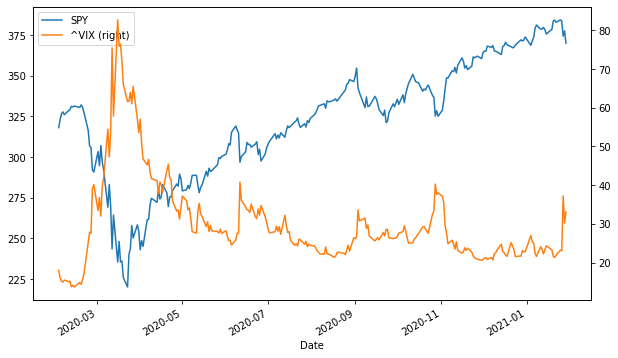

In [29]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [30]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,SPY,^VIX
Date,,
2020-02-03,NaN,NaN
2020-02-04,0.015126,-0.112995
2020-02-05,0.011482,-0.057708
2020-02-06,0.003359,-0.012621
2020-02-07,-0.005344,0.033523


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

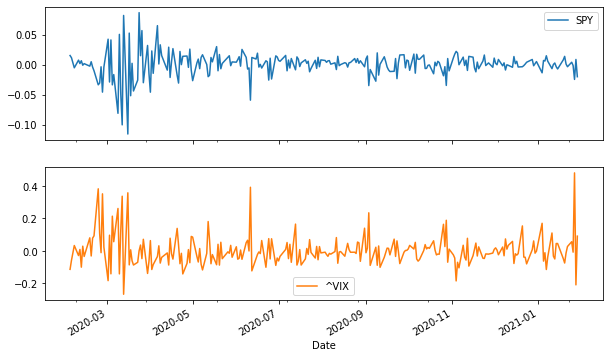

In [31]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='^VIX', ylabel='SPY'>],
       [<AxesSubplot:xlabel='SPY', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

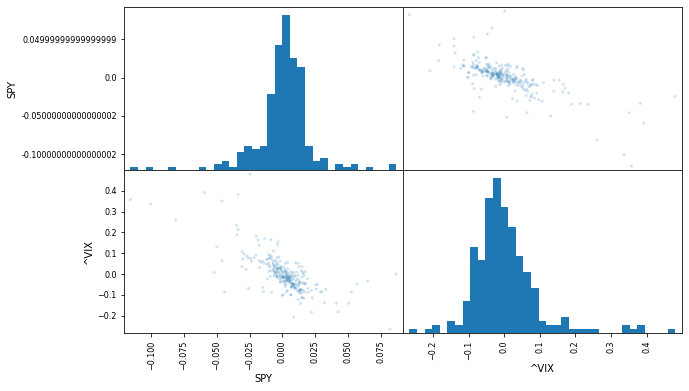

In [32]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

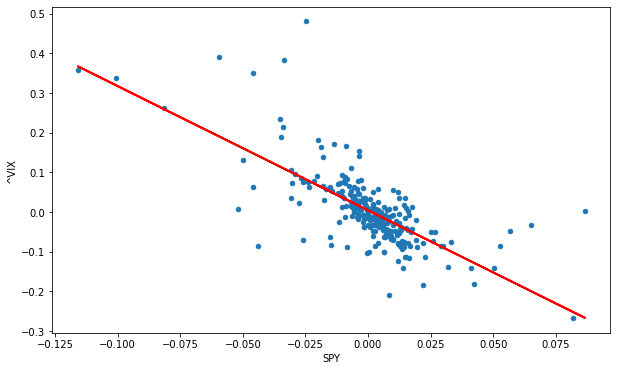

In [33]:
reg = np.polyfit(sprets['SPY'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='SPY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['SPY'], np.polyval(reg, sprets['SPY']), 'r', lw=2);

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [34]:
sprets.corr()

,SPY,^VIX
SPY,1.000000,-0.716763
^VIX,-0.716763,1.000000


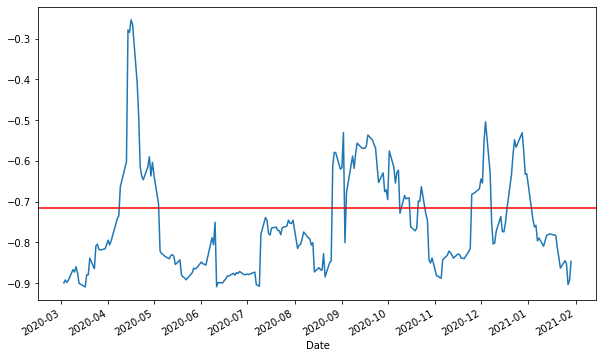

In [35]:
ax = sprets['SPY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');